In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

### Cargue de datos

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean = None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state = None)

X, Y = gaussian_quantiles

In [3]:
Y = Y[:, np.newaxis]

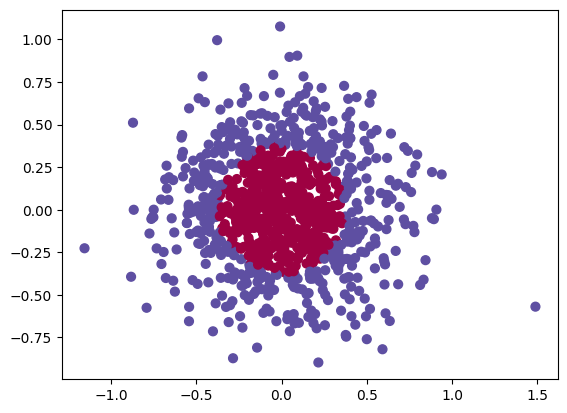

In [4]:
plt.scatter(X[:,0], X[:, 1], c = Y[:, 0], s = 40, cmap = plt.cm.Spectral)

Se busca que la red neuronal distinga que hay 2 clases en el dataset.

### Crear funciones de activación

In [5]:
def relu(x, derivate = False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0, x)


def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return  1 / (1+np.exp(-x))

### Crear funciones de perdida

In [6]:
def mse (y, y_hat, derivate = False):
    if derivate:
        return (y_hat -y)
    else:
        return np.mean((y_hat - y)**2)

### Crear estructura de la red neuronal.

Lo primero es crear los pesos y el bias.

In [7]:
# Generar capas en la red neuronal de manera aleatoria

def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2)-1
        parameters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2)-1 # Bias
    return parameters

In [8]:
layer_dims = [2, 4, 8, 1] # 2 features de entrada, 1 capa de 4 neuronas y 1 capa de 8 neuronas, con 1 neurona como capa final (resultados)
params = initialize_parameters_deep(layer_dims)

In [9]:
params

{'W1': array([[ 0.34528486, -0.43674566,  0.34216438, -0.78429726],
        [-0.48423368,  0.73802287,  0.4596354 , -0.19065726]]),
 'b1': array([[ 0.31796183,  0.94146297, -0.07753973, -0.59486609]]),
 'W2': array([[-0.56315844,  0.02026175,  0.80068567, -0.86575625, -0.47420671,
          0.38786036,  0.59510522,  0.94614332],
        [-0.67629971,  0.91531132, -0.6956779 , -0.56787272,  0.19518664,
          0.24368188,  0.57479164, -0.20336858],
        [-0.17070969, -0.82180866,  0.54508004,  0.29971261,  0.96917763,
          0.29974305,  0.05446489, -0.31224815],
        [ 0.77724959,  0.1805315 ,  0.15714855, -0.74733956,  0.26697817,
         -0.9695945 ,  0.20151475, -0.44550118]]),
 'b2': array([[-0.85870284,  0.50520084, -0.15336301,  0.8357522 ,  0.46065077,
         -0.42101999,  0.26010654, -0.50557756]]),
 'W3': array([[-0.02811481],
        [-0.02243289],
        [ 0.47295677],
        [-0.37361388],
        [-0.03292489],
        [ 0.82767869],
        [-0.51691433],


### Entrenamiento de la red neuronal (Forward - hacía adelante)

Aquí se toman los valores de entrada y se multiplican por los pesos aleatorios de la red neuronal.

In [10]:
params['W1'].shape

(2, 4)

In [11]:
X.shape

(1000, 2)

In [12]:
np.matmul(X, params['W1']).shape

(1000, 4)

In [13]:
# Primera capa

params['A0'] = X # Valores de entrada
params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1'] # Operación producto punto + bias
params ['A1'] = relu(params['Z1']) #Función de activación ReLU sin derivada


# Segunda capa
# Aquí el valor de entrada es el resultado de la primera capa

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2'] # Operación producto punto + bias
params ['A2'] = relu(params['Z2']) #Función de activación ReLU sin derivada


# Ultima capa (la que da los resultados)
# En la ultima capa queremos los resultados, que al final son probabilidades, así que usamos la función de activación sigmoide.

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3'] # Operación producto punto + bias
params ['A3'] = sigmoid(params['Z3']) #Función de activación ReLU sin derivada

output = params['A3']

In [17]:
#Predicciones
output

array([[0.48578642],
       [0.42869911],
       [0.4332857 ],
       [0.41835061],
       [0.44734659],
       [0.42035235],
       [0.42043159],
       [0.42844267],
       [0.43401337],
       [0.44026563],
       [0.42957681],
       [0.43824014],
       [0.43699029],
       [0.44331531],
       [0.44639805],
       [0.44615368],
       [0.44587132],
       [0.44494094],
       [0.43474429],
       [0.42093489],
       [0.42279863],
       [0.43759355],
       [0.42888935],
       [0.4287956 ],
       [0.43678009],
       [0.43011541],
       [0.45034183],
       [0.43010694],
       [0.42732582],
       [0.43987821],
       [0.42737564],
       [0.45056335],
       [0.44358079],
       [0.42534064],
       [0.43956783],
       [0.43183692],
       [0.42610147],
       [0.44507512],
       [0.4249998 ],
       [0.44672317],
       [0.44135801],
       [0.41386816],
       [0.42550498],
       [0.44068807],
       [0.42090342],
       [0.44724372],
       [0.44085542],
       [0.432

La predicción será mala porque estamos usando valores aleatorios. Para mejorar el performance hay que evaluar la función de perdida, hacer derivadas parciales, optimizar con el gradiente descendiente e ir actualizando los pesos.

### Backpropagation y descenso del gradiente

Aquí tomamos la ultima capa (la de la predicción), se pasa por la función de perdida y se propaga hacía las demás capas.

Lo primero que debemos hacer es hallar los deltas.

In [19]:
# 3ra capa
params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True) # True porque quiero usar las derivadas
# Peso 3ra capa
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

# 2da capa
params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
# Peso 2da capa
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

# 1ra capa
params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
# Peso 1ra capa
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

### Descenso del gradiente

Aquí se actualizan los pesos de la red neuronal y el bias.

In [21]:
learning_rate = 0.0001

In [22]:
# 1ra Capa
params['W3'] = params['W3'] - params['dW3'] * learning_rate
params['b3'] = params['b3'] - (np.mean(params['dW3'], axis = 0, keepdims=True))*learning_rate # Se puede usar la media o la suma

# 2da Capa
params['W2'] = params['W2'] - params['dW2'] * learning_rate
params['b2'] = params['b2'] - (np.mean(params['dW2'], axis = 0, keepdims=True))*learning_rate # Se puede usar la media o la suma

# 3ra Capa
params['W1'] = params['W1'] - params['dW1'] * learning_rate
params['b1'] = params['b1'] - (np.mean(params['dW1'], axis = 0, keepdims=True))*learning_rate # Se puede usar la media o la suma

### Función de entrenamiento (compila los pasos anteriores)
Esta función entrena la red neuronal haciendo procesamiento hacía adelante, backpropagation y descenso del gradiente para actualizar los pesos.

In [23]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
    # Backpropagation

        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])


        ## Gradinet Descent:

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

    return output

### Entrenamiento por epocas

In [39]:
#Este proceso itera la función de entrenamiento 50mil veces.

layer_dims = [2, 4, 8, 1] # 2 features de entrada, 1 capa de 4 neuronas y 1 capa de 8 neuronas, con 1 neurona como capa final (resultados)
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,  0.0001, params)
    if _ % 25 == 0:
        print(mse(Y, output))
        errors.append(mse(Y, output))

0.3229867615411986
0.3019164426707355
0.2860576244708131
0.27431304795058925
0.26569054885269316
0.2593650520675018
0.254716032222896
0.25126812192177667
0.24866195452008097
0.246662731665388
0.24507637500406743
0.24379047288918848
0.24270896624030688
0.24176384566635362
0.24091467928214275
0.24011533243660574
0.2393435187235528
0.2385951259328811
0.23786038115944957
0.23712829924344153
0.23639566871049966
0.23565702388607093
0.2349158555317722
0.2341637219731272
0.23339944149035358
0.23261293816304407
0.23180892289359195
0.23098458066046385
0.23014029266335484
0.22927621281237856
0.2283911348776461
0.2274885735031707
0.22656940489477545
0.22562694080755238
0.224668047427959
0.2236907035470668
0.22269325098133852
0.22166126360047897
0.22058747952106392
0.21947843175874637
0.21832737783845266
0.21711309337129506
0.21586204398615008
0.21457075543532897
0.21325085164773705
0.2118948350512544
0.2104711629071162
0.20902262795481305
0.20754672373922528
0.20603909453833705
0.20449556979174363

Se observa como el error disminuye a medida que se van haciendo iteraciones.

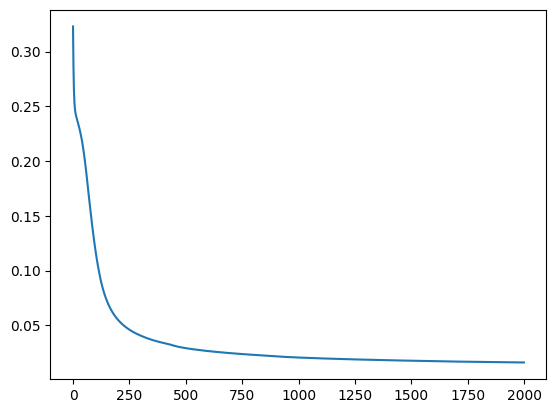

In [40]:
plt.plot(errors)

### Prueba de la red neuronal

***Ejecutamos la linea 42 y 43, despues ejecutamos la linea 39 y 40, y nuevamente corremos la linea 42, 43 y 44 para ver los resutados.

In [42]:
data_test = (np.random.rand(1000, 2)*2)-1
y = train(data_test, 0.0001, params, training=False)

In [43]:
y = np.where(y>=0.5,1,0)

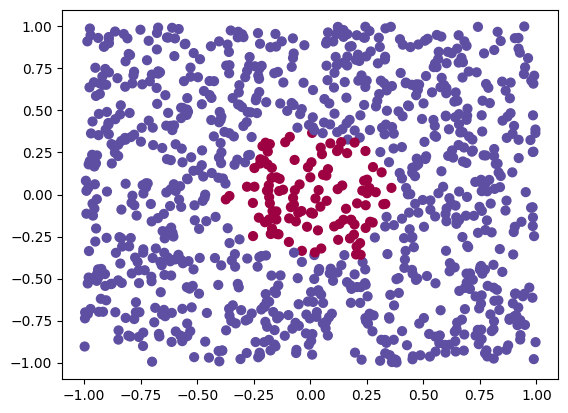

In [44]:
plt.scatter(data_test[:,0], data_test[:, 1], c = y[:, 0], s = 40, cmap = plt.cm.Spectral)